# Welcome to exa!

In [1]:
import pandas as pd
import numpy as np
import exa

### You might be familiar with pandas

In [2]:
x = np.linspace(0, 10, 11)
y = np.random.rand(11)
df1 = pd.DataFrame.from_dict({'x': x, 'y': y})
df1.head()

,x,y
0,0.0,0.906796
1,1.0,0.448143
2,2.0,0.105326
3,3.0,0.010824
4,4.0,0.244684


### DataFrames are great! Usually you can find a way to represent your data in a single dataframe

In [3]:
df1 = pd.DataFrame.from_dict({'x': x, 'y': y})
b = pd.DataFrame(np.random.rand(11, 3))
b.columns = ['zi', 'zj', 'zk']
pd.concat([df1, b], axis=1).head()

,x,y,zi,zj,zk
0,0.0,0.906796,0.733138,0.396978,0.448463
1,1.0,0.448143,0.413719,0.755660,0.719040
2,2.0,0.105326,0.173512,0.154888,0.757688
3,3.0,0.010824,0.730557,0.718124,0.229439
4,4.0,0.244684,0.055820,0.428332,0.083746


### Sometimes data doesn't fit nicely into a single dataframe

In [4]:
array_params = pd.DataFrame.from_dict({'ox': [-3.0], 'oy': [-3.0], 
                                       'nx': [15],   'ny': [15],
                                      'dxi': [0.4], 'dyj': [0.4]})
array_values = pd.DataFrame.from_dict({'f1': (np.random.rand(15 * 15)),
                                       'f2': (np.random.rand(15 * 15))})
print(array_params)
array_values.head()

   dxi  dyj  nx  ny   ox   oy
0  0.4  0.4  15  15 -3.0 -3.0


,f1,f2
0,0.126503,0.827317
1,0.389927,0.768678
2,0.388104,0.187729
3,0.408751,0.614016
4,0.011289,0.499478


### The exa Container links dataframes together with minimal effort

In [5]:
class Param(exa.DataFrame):
    _indices = ['param_index'] # Set as the dataframe's index
    
class Value(exa.DataFrame):
    _columns = ['param_index'] # Set as a REQUIRED column in the dataframe's construction

In [6]:
array_params.index.name = 'param_index'
array_values['param_index'] = 0
t = exa.Container(params=Param(array_params), values=Value(array_values))

### The network() method shows you a network graph of the relationships in your data

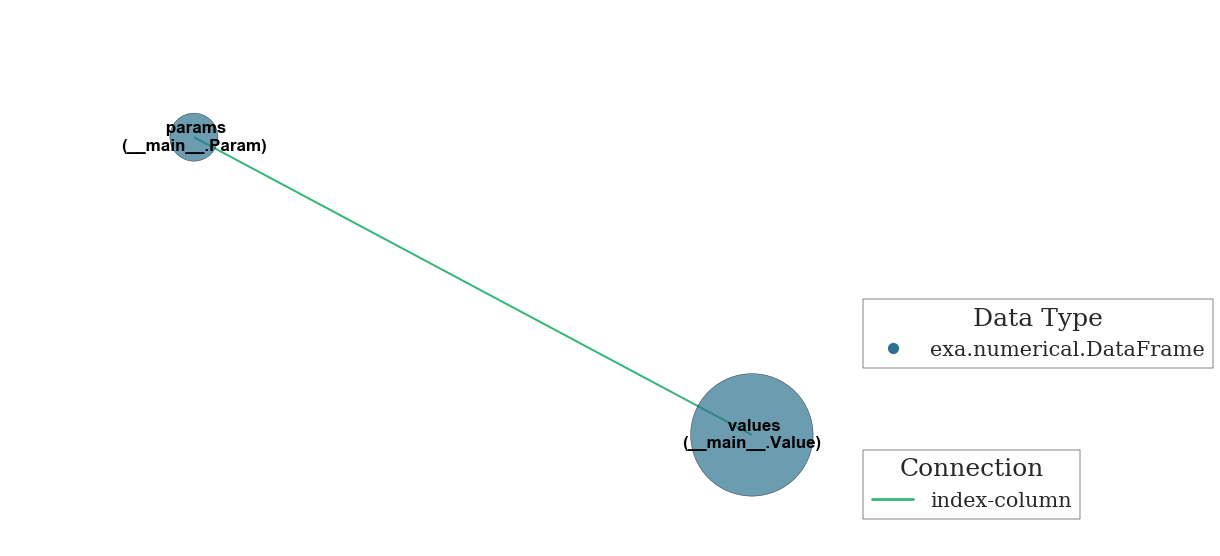

In [7]:
t.network()

### There are idx-col and col-col relationships, as well as other class attributes

#### Categories are efficient if your data has a small number of possible values but normally require special attention
#### with the _categories attribute, they require no special attention

In [8]:
class CatDF(exa.DataFrame):
    _categories = {'cat1': str, 'cat2': np.int64}

In [9]:
# Note that the pandas API remains intact
c = CatDF.from_dict({'cat1': ['foo'] * 30 + ['bar'] * 40, 'cat2': [0] * 18 + [1] * 13 + [2] * 39})
print(c.dtypes)
c.head()

cat1    category
cat2    category
dtype: object


,cat1,cat2
0,foo,0
1,foo,0
2,foo,0
3,foo,0
4,foo,0


### There are attributes for _groupbys, _traits, _precision allowing for automatic passing to JS widgets

In [10]:
class TraitDF(exa.DataFrame):
    _traits = ['f1', 'f2']
    _precision = {'f1': 8, 'f2': 3}

In [11]:
tr = exa.Container(values=TraitDF(array_values))

In [12]:
tr

In [13]:
tr._traits_need_update

False

In [14]:
tr._widget.traitdf_f2

'[0.827,0.769,0.188,0.614,0.499,0.942,0.252,0.173,0.374,0.207,0.317,0.549,0.169,0.607,0.351,0.854,0.048,0.446,0.617,0.891,0.029,0.556,0.621,0.812,0.36,0.154,0.902,0.821,0.876,0.497,0.479,0.839,0.643,0.222,0.472,0.586,0.115,0.821,0.232,0.959,0.237,0.722,0.679,0.496,0.865,0.893,0.529,0.856,0.272,0.66,0.935,0.275,0.604,0.399,0.334,0.656,0.771,0.044,0.758,0.725,0.508,0.408,0.129,0.102,0.687,0.735,0.221,0.119,0.19,0.049,0.2,0.217,0.716,0.297,0.085,0.025,0.163,0.537,0.628,0.815,0.58,0.154,0.24,0.93,0.275,0.935,0.669,0.125,0.925,0.357,0.314,0.449,0.556,0.062,0.37,0.472,0.969,0.867,0.291,0.233,0.09,0.826,0.157,0.411,0.228,0.758,0.235,0.419,0.033,0.019,0.605,0.358,0.58,0.255,0.066,0.719,0.425,0.406,0.796,0.304,0.858,0.972,0.817,0.063,0.789,0.635,0.369,0.192,0.464,0.002,0.088,0.804,0.427,0.882,0.933,0.942,0.628,0.326,0.488,0.523,0.335,0.852,0.222,0.38,0.233,0.457,0.866,0.409,0.03,0.342,0.558,0.991,0.148,0.987,0.646,0.544,0.553,0.827,0.467,0.654,0.477,0.101,0.35,0.364,0.193,0.265,0.875,0.925,0.21

In [15]:
class GroupDF(exa.DataFrame):
    _columns = ['f1', 'f2']
    _traits = ['f1', 'f2']
    _precision = {'f1': 2, 'f2': 2}
    _groupbys = ['grp']

In [16]:
array_values['grp'] = np.repeat(range(15), 15)
gr = exa.Container(values=GroupDF(array_values))
gr._update_traits()

In [17]:
gr._widget.groupdf_f2

'[[0.83,0.77,0.19,0.61,0.5,0.94,0.25,0.17,0.37,0.21,0.32,0.55,0.17,0.61,0.35],[0.85,0.05,0.45,0.62,0.89,0.03,0.56,0.62,0.81,0.36,0.15,0.9,0.82,0.88,0.5],[0.48,0.84,0.64,0.22,0.47,0.59,0.11,0.82,0.23,0.96,0.24,0.72,0.68,0.5,0.87],[0.89,0.53,0.86,0.27,0.66,0.93,0.28,0.6,0.4,0.33,0.66,0.77,0.04,0.76,0.72],[0.51,0.41,0.13,0.1,0.69,0.74,0.22,0.12,0.19,0.05,0.2,0.22,0.72,0.3,0.09],[0.03,0.16,0.54,0.63,0.82,0.58,0.15,0.24,0.93,0.28,0.93,0.67,0.13,0.92,0.36],[0.31,0.45,0.56,0.06,0.37,0.47,0.97,0.87,0.29,0.23,0.09,0.83,0.16,0.41,0.23],[0.76,0.23,0.42,0.03,0.02,0.6,0.36,0.58,0.26,0.07,0.72,0.43,0.41,0.8,0.3],[0.86,0.97,0.82,0.06,0.79,0.63,0.37,0.19,0.46,0.0,0.09,0.8,0.43,0.88,0.93],[0.94,0.63,0.33,0.49,0.52,0.33,0.85,0.22,0.38,0.23,0.46,0.87,0.41,0.03,0.34],[0.56,0.99,0.15,0.99,0.65,0.54,0.55,0.83,0.47,0.65,0.48,0.1,0.35,0.36,0.19],[0.27,0.88,0.93,0.22,0.94,0.1,0.77,0.8,0.99,0.92,0.9,0.52,0.17,0.94,0.19],[0.02,0.27,0.24,0.89,0.28,0.34,0.81,0.21,0.51,0.03,0.82,0.51,0.91,0.41,0.97],[0.68,0.29,0.62

### Trait data is passed to JS for viewing in a widget with a rather capable app utilizing Three.JS and WebGL

In [18]:
exa.Container()

dict_keys(['type', 'app', 'content', 'data'])


### The real power is in crafting a container specific to the needs of a data set

### There is also an Editor class that makes repetitive file I/O tasks simpler

In [19]:
s = exa.Editor('exa_demo.ipynb')    # Before you run this cell, save the notebook!
s

  0: {
  1:  "cells": [
  2:   {
  3:    "cell_type": "markdown",
  4:    "metadata": {},
  5:    "source": [
  6:     "### Welcome to exa! Let's get started"
  7:    ]
  8:   },
  9:   {
 10:    "cell_type": "code",
 11:    "execution_count": 1,
 12:    "metadata": {
 13:     "collapsed": false
 14:    },
 15:    "outputs": [],
 16:    "source": [
 17:     "import pandas as pd\n",
 18:     "import numpy as np\n",
 19:     "import exa"
 20:    ]
 21:   },
 22:   {
 23:    "cell_type": "markdown",
 24:    "metadata": {},
 25:    "source": [
 26:     "### You might be familiar with pandas"
 27:    ]
 28:   },
 29:   {
...
764:    "execution_count": null,
765:    "metadata": {
766:     "collapsed": true
767:    },
768:    "outputs": [],
769:    "source": []
770:   }
771:  ],
772:  "metadata": {
773:   "kernelspec": {
774:    "display_name": "Python 3",
775:    "language": "python",
776:    "name": "python3"
777:   },
778:   "language_info": {
779:    "codemirror_mode": {
780:     "name": 

In [20]:
s.find('exa_demo.ipynb')

{'exa_demo.ipynb': OrderedDict([(733,
               '    "s = exa.Editor(\'exa_demo.ipynb\')    # Before you run this cell, save the notebook!\\n",'),
              (747, '       "{\'exa_demo.ipynb\': OrderedDict([(733,\\n",'),
              (748,
               '       "               \'    \\"s = exa.Editor(\\\\\'exa_demo.ipynb\\\\\')\\\\\\\\n\\",\'),\\n",'),
              (749,
               '       "              (747, \'       \\"{\\\\\'exa_demo.ipynb\\\\\': OrderedDict()}\\"\'),\\n",'),
              (750,
               '       "              (756, \'    \\"s.find(\\\\\'exa_demo.ipynb\\\\\')\\"\')])}"'),
              (759, '    "s.find(\'exa_demo.ipynb\')"')])}